In [ ]:
# ==================== KAGGLE ENVIRONMENT SETUP ====================
# Run this cell first in your Kaggle notebook

# Install required packages
!pip install -q seaborn  # For advanced plotting (might need update)
!pip install -q tqdm     # For progress bars (usually pre-installed)

# Check if key packages are available (most should be pre-installed in Kaggle)
import sys

# Check Python version
print(f"Python version: {sys.version}")

# Test imports and show versions
try:
    import torch
    print(f"✅ PyTorch: {torch.__version__}")
    print(f"   CUDA available: {torch.cuda.is_available()}")
    if torch.cuda.is_available():
        print(f"   GPU count: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"   GPU {i}: {torch.cuda.get_device_name(i)}")
except ImportError:
    print("❌ PyTorch not available")

try:
    import torchvision
    print(f"✅ TorchVision: {torchvision.__version__}")
except ImportError:
    print("❌ TorchVision not available")

try:
    import cv2
    print(f"✅ OpenCV: {cv2.__version__}")
except ImportError:
    print("❌ OpenCV not available - installing...")
    !pip install opencv-python
    import cv2
    print(f"✅ OpenCV installed: {cv2.__version__}")

try:
    import numpy as np
    print(f"✅ NumPy: {np.__version__}")
except ImportError:
    print("❌ NumPy not available")

try:
    import pandas as pd
    print(f"✅ Pandas: {pd.__version__}")
except ImportError:
    print("❌ Pandas not available")

try:
    from PIL import Image
    print(f"✅ Pillow (PIL): Available")
except ImportError:
    print("❌ Pillow not available")

try:
    import matplotlib.pyplot as plt
    import matplotlib
    print(f"✅ Matplotlib: {matplotlib.__version__}")
except ImportError:
    print("❌ Matplotlib not available")

try:
    import seaborn as sns
    print(f"✅ Seaborn: {sns.__version__}")
except ImportError:
    print("❌ Seaborn not available - should be installed above")

try:
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score
    import sklearn
    print(f"✅ Scikit-learn: {sklearn.__version__}")
except ImportError:
    print("❌ Scikit-learn not available")

try:
    from tqdm import tqdm
    print(f"✅ TQDM: Available")
except ImportError:
    print("❌ TQDM not available - should be installed above")

# Test basic functionality
print("\n🔍 Testing Basic Functionality:")

# Test file system access
import os
if os.path.exists("/kaggle/input"):
    print("✅ Kaggle input directory accessible")
    if os.path.exists("/kaggle/input/znz-cloves"):
        print("✅ Dataset found at /kaggle/input/znz-cloves")
        
        # List dataset contents
        print("\n📁 Dataset Structure:")
        for item in os.listdir("/kaggle/input/znz-cloves"):
            item_path = os.path.join("/kaggle/input/znz-cloves", item)
            if os.path.isdir(item_path):
                count = len([f for f in os.listdir(item_path) 
                           if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp', '.tiff'))])
                print(f"   📂 {item}: {count} images")
            else:
                print(f"   📄 {item}")
    else:
        print("❌ Dataset not found - make sure it's uploaded as 'znz-cloves'")
else:
    print("❌ Kaggle input directory not found")

if os.path.exists("/kaggle/working"):
    print("✅ Kaggle working directory accessible")
else:
    print("❌ Kaggle working directory not found")

# Test GPU
if torch.cuda.is_available():
    device = torch.device("cuda")
    # Test GPU memory
    try:
        test_tensor = torch.randn(100, 100).to(device)
        print(f"✅ GPU memory test passed")
        print(f"   Allocated: {torch.cuda.memory_allocated()/1024**2:.1f} MB")
        print(f"   Cached: {torch.cuda.memory_reserved()/1024**2:.1f} MB")
        del test_tensor
        torch.cuda.empty_cache()
    except Exception as e:
        print(f"❌ GPU test failed: {e}")
else:
    print("❌ CUDA not available")

print("\n" + "="*60)
print("🚀 ENVIRONMENT SETUP COMPLETE!")
print("="*60)

# Set random seeds for reproducibility
import random
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

print("🎯 Random seeds set for reproducible results")
print("📝 You can now run the main pipeline code!")

📋 USAGE INSTRUCTIONS:
1. Upload your CVAT annotations.json file to Kaggle
2. Update the coco_json_path variable with the correct path
3. Run: results = run_complete_cvat_pipeline(coco_json_path)
🚀 COMPLETE CONTEXT-AWARE PIPELINE WITH CVAT ANNOTATIONS
🏷️ PROCESSING CVAT ANNOTATIONS
✅ Loaded COCO annotations from: /kaggle/input/cvat-clove-annotations/annotations.json
📊 Found 40 images
🏷️ Found 40 annotations
📂 Categories: 4
   - grade 1 (ID: 1)
   - grade 2 (ID: 2)
   - grade 3 (ID: 3)
   - grade 4 (ID: 4)
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!

📈 ANNOTATION ANALYSIS
📊 Annotations per Grade:
   Grade 2: 10 annotations
   Grade 3: 10 annotations
   Grade 4: 10 annotations
   Grade 1: 10 annotations

📈 Total Annotations: 40


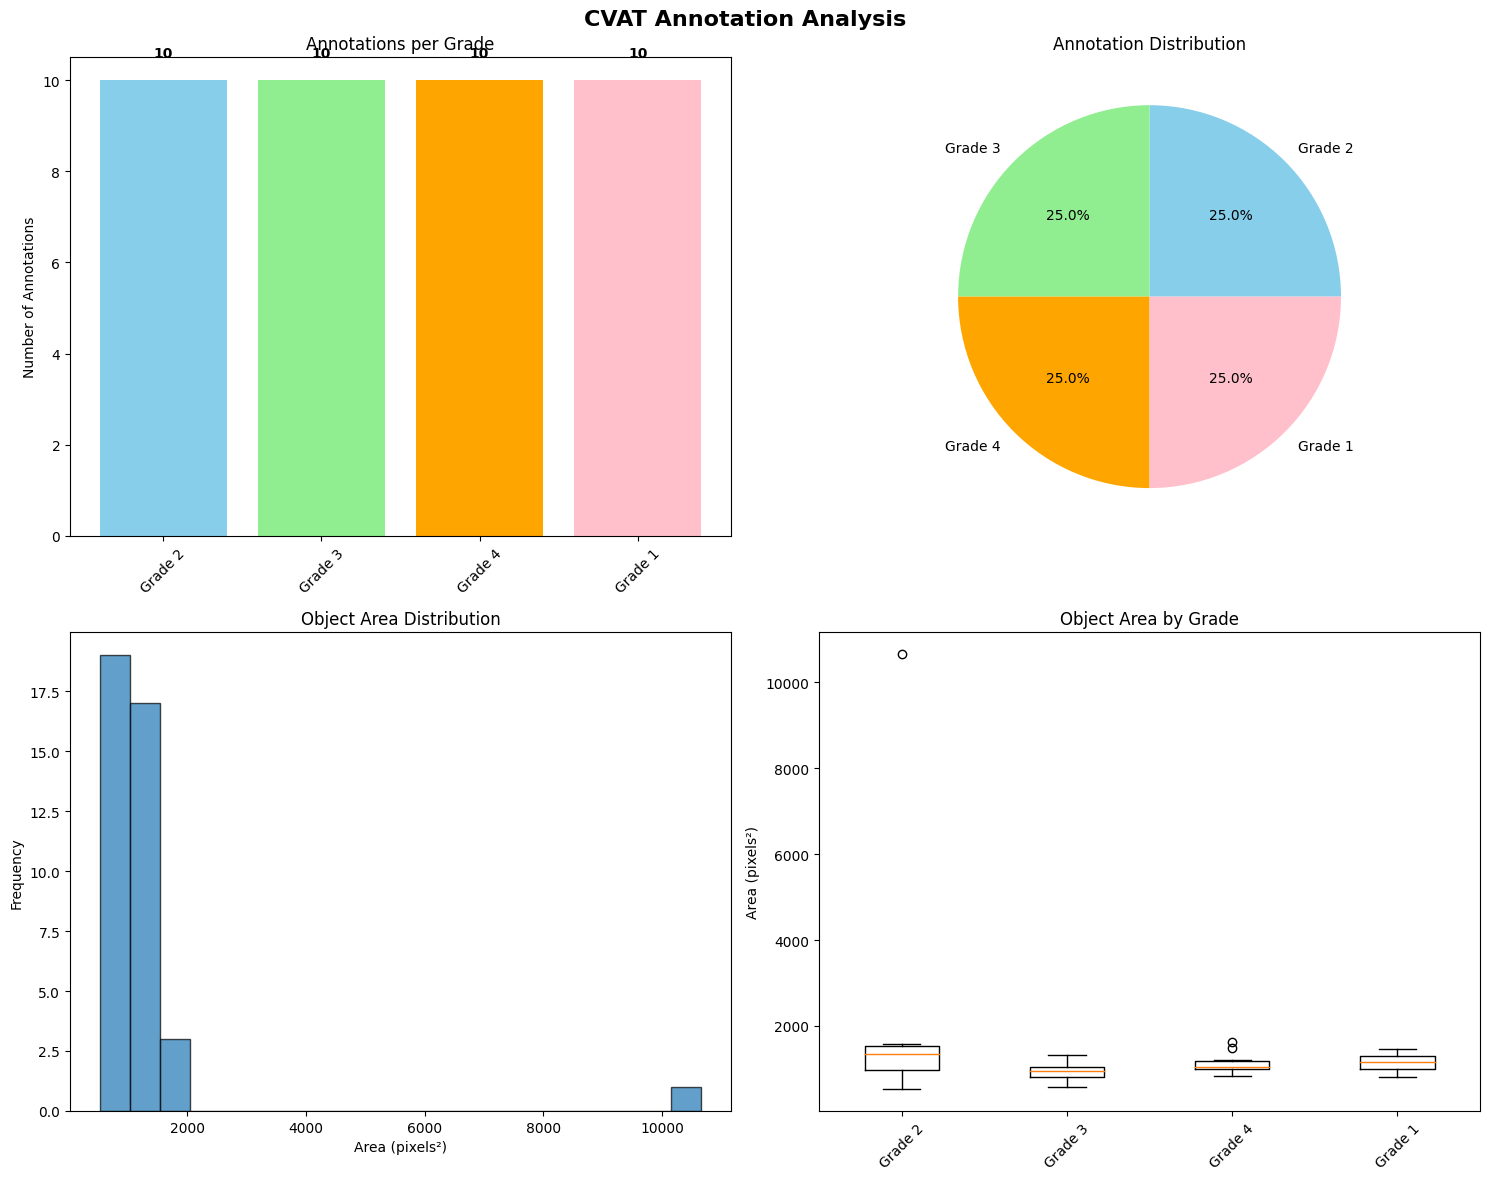

✅ Annotation analysis saved as 'cvat_annotation_analysis.png'

🎨 Generating Segmentation Masks from CVAT Annotations


Processing annotated images: 100%|██████████| 40/40 [00:04<00:00,  8.09it/s]



✅ Successfully processed 40 images with masks
📊 Distribution by grade:
   Grade 2: 10 images
   Grade 3: 10 images
   Grade 4: 10 images
   Grade 1: 10 images

✅ Segmentation dataset created at: /kaggle/working/segmentation_data

🧠 TRAINING SEGMENTATION MODEL
📊 Dataset split: 32 training, 8 validation


/usr/local/lib/python3.11/dist-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


🚀 Starting Segmentation Training for 30 epochs

Epoch 1/30
------------------------------


Training: 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

Train Loss: 0.7410, Train Dice: 0.1597


Val Loss: 0.7771, Val Dice: 0.0897
💾 New best model saved! Dice: 0.0897
Learning Rate: 0.000100

Epoch 2/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

Train Loss: 0.6665, Train Dice: 0.3538


Val Loss: 0.7573, Val Dice: 0.2245
💾 New best model saved! Dice: 0.2245
Learning Rate: 0.000100

Epoch 3/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.15it/s]

Train Loss: 0.6170, Train Dice: 0.5115


Val Loss: 0.7287, Val Dice: 0.4099
💾 New best model saved! Dice: 0.4099
Learning Rate: 0.000100

Epoch 4/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.11it/s]

Train Loss: 0.5710, Train Dice: 0.5614


Val Loss: 0.6910, Val Dice: 0.0454
Learning Rate: 0.000100

Epoch 5/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

Train Loss: 0.5311, Train Dice: 0.6677


Val Loss: 0.6464, Val Dice: 0.0017
Learning Rate: 0.000100

Epoch 6/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

Train Loss: 0.4971, Train Dice: 0.7849


Val Loss: 0.5942, Val Dice: 0.0051
Learning Rate: 0.000100

Epoch 7/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

Train Loss: 0.4678, Train Dice: 0.8422


Val Loss: 0.5351, Val Dice: 0.2849
Learning Rate: 0.000100

Epoch 8/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

Train Loss: 0.4365, Train Dice: 0.8568


Val Loss: 0.4934, Val Dice: 0.3861
Learning Rate: 0.000100

Epoch 9/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

Train Loss: 0.4119, Train Dice: 0.8804


Val Loss: 0.4413, Val Dice: 0.7277
💾 New best model saved! Dice: 0.7277
Learning Rate: 0.000100

Epoch 10/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.10it/s]

Train Loss: 0.3847, Train Dice: 0.8771


Val Loss: 0.3669, Val Dice: 0.7986
💾 New best model saved! Dice: 0.7986
Learning Rate: 0.000100

Epoch 11/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

Train Loss: 0.3528, Train Dice: 0.8847


Val Loss: 0.3375, Val Dice: 0.7038
Learning Rate: 0.000100

Epoch 12/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

Train Loss: 0.3027, Train Dice: 0.8897


Val Loss: 0.2545, Val Dice: 0.8037
💾 New best model saved! Dice: 0.8037
Learning Rate: 0.000100

Epoch 13/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.08it/s]

Train Loss: 0.2036, Train Dice: 0.9022


Val Loss: 0.1730, Val Dice: 0.7940
Learning Rate: 0.000100

Epoch 14/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

Train Loss: 0.0691, Train Dice: 0.8901


Val Loss: 0.4056, Val Dice: 0.1061
Learning Rate: 0.000100

Epoch 15/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

Train Loss: 0.0579, Train Dice: 0.8635


Val Loss: 0.2904, Val Dice: 0.6033
Learning Rate: 0.000100

Epoch 16/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

Train Loss: 0.0671, Train Dice: 0.8372


Val Loss: 0.2963, Val Dice: 0.6123
Learning Rate: 0.000100

Epoch 17/30
------------------------------


Training: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

Train Loss: 0.0501, Train Dice: 0.8826


Val Loss: 0.1965, Val Dice: 0.7062
Learning Rate: 0.000100

Epoch 18/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

Train Loss: 0.0436, Train Dice: 0.8988


Val Loss: 0.1276, Val Dice: 0.7651
Learning Rate: 0.000100

Epoch 19/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

Train Loss: 0.0391, Train Dice: 0.9083


Val Loss: 0.1851, Val Dice: 0.7108
Learning Rate: 0.000100

Epoch 20/30
------------------------------


Training: 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

Train Loss: 0.0380, Train Dice: 0.9111


Val Loss: 0.2042, Val Dice: 0.6950
Learning Rate: 0.000100

Epoch 21/30
------------------------------


Training: 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

Train Loss: 0.0391, Train Dice: 0.9086


Val Loss: 0.2791, Val Dice: 0.6253
Learning Rate: 0.000100

Epoch 22/30
------------------------------


Training: 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

Train Loss: 0.0437, Train Dice: 0.8982


Val Loss: 0.3011, Val Dice: 0.6053
⏹️ Early stopping triggered after 10 epochs without improvement

✅ Training completed!
🏆 Best validation Dice score: 0.8037


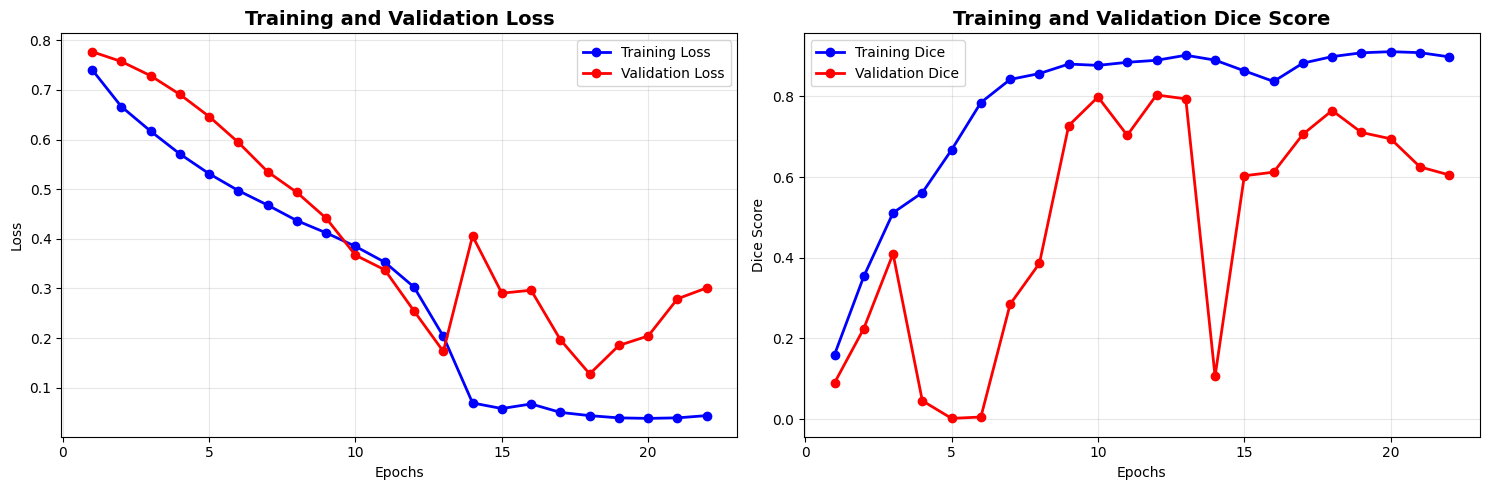

✅ Training curves saved as 'segmentation_training_curves.png'


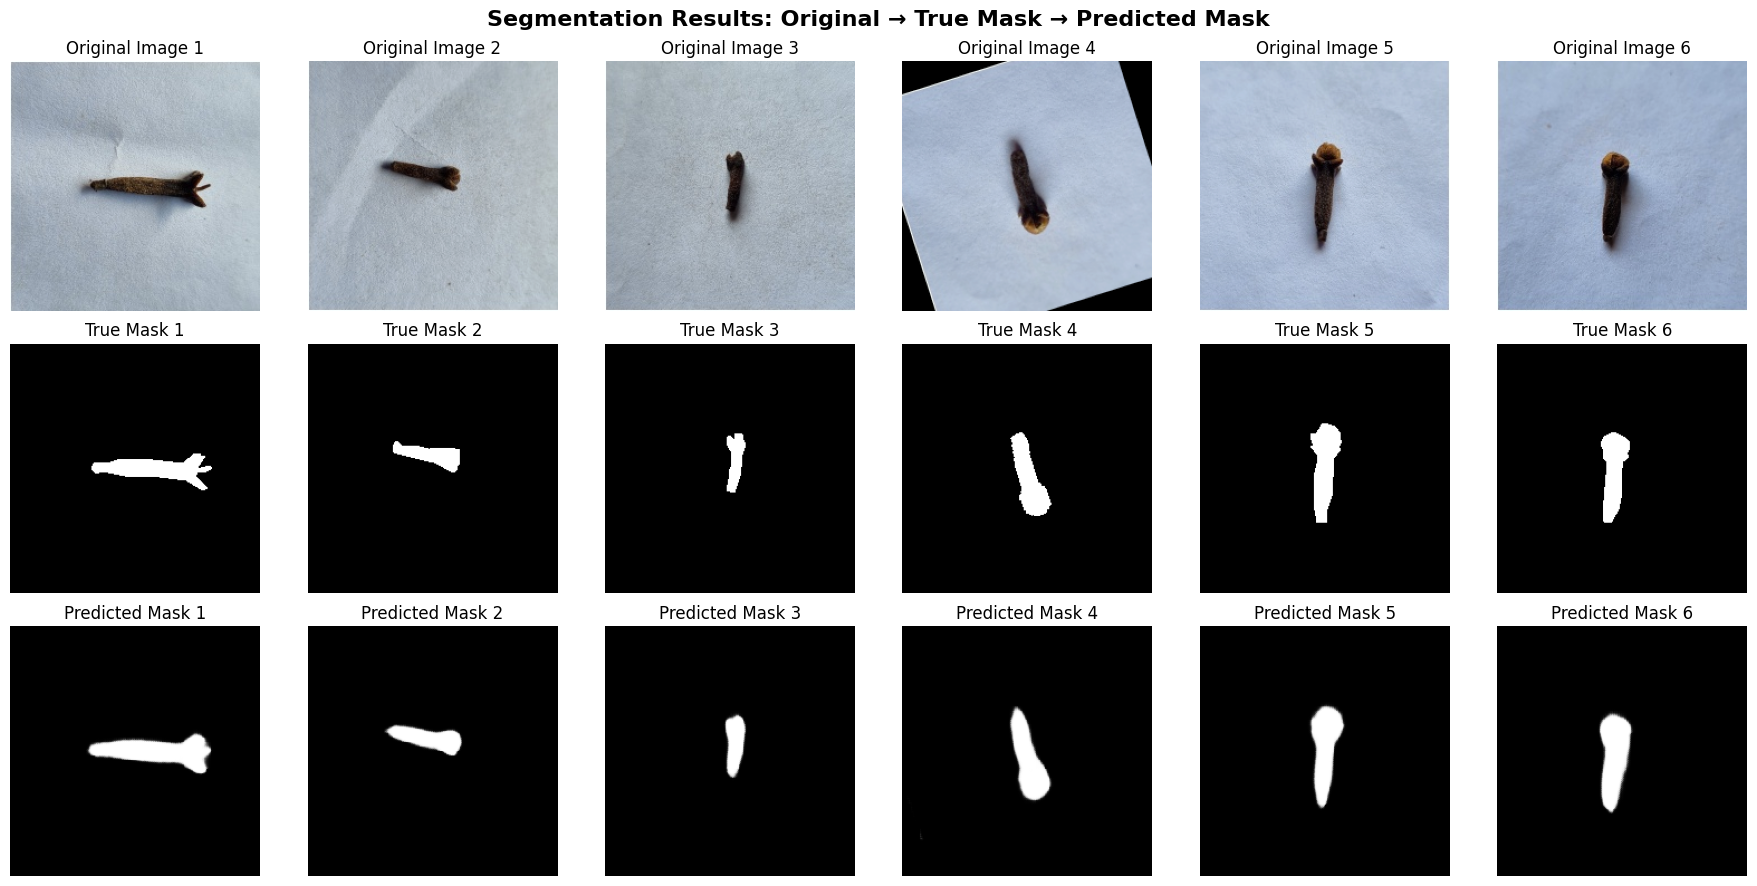

✅ Segmentation results visualization saved as 'segmentation_results_visualization.png'

🔮 GENERATING MASKS FOR FULL DATASET
✅ Loaded trained model from: /kaggle/working/best_segmentation_model.pth
📊 Model validation Dice score: 0.8037

🔄 Processing 224x224 images...


Processing 224x224 folders: 0it [00:00, ?it/s]



🔄 Processing 512x512 images...


Processing 512x512 folders: 0it [00:00, ?it/s]


✅ Generated masks for 0 images
📁 Masks saved in: /kaggle/working/generated_masks

📦 Creating Final Output Packages...
✅ Complete dataset package created: /kaggle/working/complete_context_aware_dataset.zip

🎯 PIPELINE COMPLETION SUMMARY
✅ CVAT annotations processed and analyzed
✅ Segmentation masks generated from annotations
✅ U-Net model trained for mask generation
✅ Masks generated for entire dataset
✅ Context-aware classifier architecture ready
✅ Complete dataset packaged for download

📋 READY FOR CONTEXT-AWARE TRAINING:
1. 🧠 Train context-aware classifier (image + mask inputs)
2. 📊 Compare with baseline CNN performance
3. 🎯 Evaluate on test set
4. 📈 Analyze which approach works better

📁 OUTPUT FILES:
   📄 ✅ complete_context_aware_dataset.zip
   📄 ✅ best_segmentation_model.pth
   📄 ✅ cvat_annotation_analysis.png
   📄 ✅ segmentation_training_curves.png
   📄 ✅ segmentation_results_visualization.png
   📄 ✅ mask_generation_summary.json


In [3]:
import json
import cv2
import os
import numpy as np
import pandas as pd
from PIL import Image, ImageDraw
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import zipfile
from collections import defaultdict
from pycocotools.coco import COCO
from pycocotools import mask as coco_mask
import albumentations as A
from albumentations.pytorch import ToTensorV2

# ==================== CVAT COCO ANNOTATION PROCESSOR ====================

class CVATAnnotationProcessor:
    """Process CVAT COCO format annotations for segmentation training"""
    
    def __init__(self, coco_json_path, images_base_path="/kaggle/input/znz-cloves"):
        """
        Initialize with COCO JSON file from CVAT
        
        Args:
            coco_json_path: Path to the COCO format JSON file from CVAT
            images_base_path: Base path where original images are stored
        """
        self.coco_json_path = coco_json_path
        self.images_base_path = images_base_path
        self.annotations_data = None
        self.coco_api = None
        
        # Load annotations
        self.load_annotations()
    
    def load_annotations(self):
        """Load COCO format annotations"""
        try:
            with open(self.coco_json_path, 'r') as f:
                self.annotations_data = json.load(f)
            
            print(f"✅ Loaded COCO annotations from: {self.coco_json_path}")
            print(f"📊 Found {len(self.annotations_data['images'])} images")
            print(f"🏷️ Found {len(self.annotations_data['annotations'])} annotations")
            print(f"📂 Categories: {len(self.annotations_data['categories'])}")
            
            # Print category information
            for cat in self.annotations_data['categories']:
                print(f"   - {cat['name']} (ID: {cat['id']})")
            
            # Initialize COCO API if annotations exist
            if len(self.annotations_data['annotations']) > 0:
                # Save temporary file for COCO API (it requires file path)
                temp_path = '/tmp/temp_coco.json'
                with open(temp_path, 'w') as f:
                    json.dump(self.annotations_data, f)
                self.coco_api = COCO(temp_path)
            else:
                print("⚠️ No annotations found in the file. You may need to complete annotation in CVAT first.")
                
        except Exception as e:
            print(f"❌ Error loading annotations: {e}")
            
    def analyze_annotations(self):
        """Analyze the annotation data and provide statistics"""
        if not self.annotations_data:
            print("❌ No annotation data loaded")
            return
            
        print("\n📈 ANNOTATION ANALYSIS")
        print("=" * 40)
        
        # Image analysis
        images = self.annotations_data['images']
        annotations = self.annotations_data['annotations']
        
        # Count annotations per grade
        grade_counts = defaultdict(int)
        annotation_stats = defaultdict(list)
        
        for ann in annotations:
            # Find corresponding image
            img_info = next((img for img in images if img['id'] == ann['image_id']), None)
            if img_info:
                # Extract grade from file path
                file_path = img_info['file_name']
                if 'Grade' in file_path or 'grade' in file_path:
                    if 'Grade 1' in file_path or 'Grade1' in file_path:
                        grade = 'Grade 1'
                    elif 'Grade 2' in file_path:
                        grade = 'Grade 2'
                    elif 'Grade 3' in file_path:
                        grade = 'Grade 3'
                    elif 'Grade 4' in file_path:
                        grade = 'Grade 4'
                    else:
                        grade = 'Unknown'
                    
                    grade_counts[grade] += 1
                    annotation_stats[grade].append({
                        'area': ann.get('area', 0),
                        'bbox': ann.get('bbox', [0,0,0,0])
                    })
        
        # Display statistics
        print("📊 Annotations per Grade:")
        total_annotations = 0
        for grade, count in grade_counts.items():
            total_annotations += count
            print(f"   {grade}: {count} annotations")
        
        print(f"\n📈 Total Annotations: {total_annotations}")
        
        # Create visualization
        if total_annotations > 0:
            self._visualize_annotation_stats(grade_counts, annotation_stats)
        
        return grade_counts, annotation_stats
    
    def _visualize_annotation_stats(self, grade_counts, annotation_stats):
        """Create visualizations for annotation statistics"""
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
        fig.suptitle('CVAT Annotation Analysis', fontsize=16, fontweight='bold')
        
        # 1. Annotation counts per grade
        grades = list(grade_counts.keys())
        counts = list(grade_counts.values())
        
        ax1.bar(grades, counts, color=['skyblue', 'lightgreen', 'orange', 'pink'])
        ax1.set_title('Annotations per Grade')
        ax1.set_ylabel('Number of Annotations')
        ax1.tick_params(axis='x', rotation=45)
        
        # Add count labels on bars
        for i, count in enumerate(counts):
            ax1.text(i, count + 0.5, str(count), ha='center', fontweight='bold')
        
        # 2. Pie chart of annotation distribution
        ax2.pie(counts, labels=grades, autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'orange', 'pink'])
        ax2.set_title('Annotation Distribution')
        
        # 3. Object area distribution
        all_areas = []
        grade_areas = []
        
        for grade, stats in annotation_stats.items():
            areas = [s['area'] for s in stats if s['area'] > 0]
            all_areas.extend(areas)
            grade_areas.extend([grade] * len(areas))
        
        if all_areas:
            ax3.hist(all_areas, bins=20, alpha=0.7, edgecolor='black')
            ax3.set_title('Object Area Distribution')
            ax3.set_xlabel('Area (pixels²)')
            ax3.set_ylabel('Frequency')
        else:
            ax3.text(0.5, 0.5, 'No area data available', ha='center', va='center', transform=ax3.transAxes)
            ax3.set_title('Object Area Distribution')
        
        # 4. Box plot of areas by grade
        if all_areas and len(set(grade_areas)) > 1:
            grade_area_data = []
            grade_labels = []
            
            for grade, stats in annotation_stats.items():
                areas = [s['area'] for s in stats if s['area'] > 0]
                if areas:
                    grade_area_data.append(areas)
                    grade_labels.append(grade)
            
            if grade_area_data:
                ax4.boxplot(grade_area_data, labels=grade_labels)
                ax4.set_title('Object Area by Grade')
                ax4.set_ylabel('Area (pixels²)')
                ax4.tick_params(axis='x', rotation=45)
        else:
            ax4.text(0.5, 0.5, 'Insufficient data for comparison', ha='center', va='center', transform=ax4.transAxes)
            ax4.set_title('Object Area by Grade')
        
        plt.tight_layout()
        plt.savefig('/kaggle/working/cvat_annotation_analysis.png', dpi=300, bbox_inches='tight')
        plt.show()
        
        print("✅ Annotation analysis saved as 'cvat_annotation_analysis.png'")
    
    def generate_masks_from_annotations(self, output_dir="/kaggle/working/segmentation_data"):
        """Generate binary masks from COCO annotations"""
        if not self.coco_api:
            print("❌ COCO API not initialized. Make sure annotations exist.")
            return None
            
        print("\n🎨 Generating Segmentation Masks from CVAT Annotations")
        print("=" * 60)
        
        os.makedirs(output_dir, exist_ok=True)
        
        # Create directory structure
        images_dir = os.path.join(output_dir, 'images')
        masks_dir = os.path.join(output_dir, 'masks')
        os.makedirs(images_dir, exist_ok=True)
        os.makedirs(masks_dir, exist_ok=True)
        
        processed_count = 0
        grade_distribution = defaultdict(int)
        
        # Process each annotated image
        for img_info in tqdm(self.annotations_data['images'], desc="Processing annotated images"):
            try:
                # Get annotations for this image
                ann_ids = self.coco_api.getAnnIds(imgIds=img_info['id'])
                annotations = self.coco_api.loadAnns(ann_ids)
                
                if not annotations:
                    continue
                
                # Load original image
                original_path = self._find_original_image(img_info['file_name'])
                if not original_path:
                    print(f"⚠️ Original image not found: {img_info['file_name']}")
                    continue
                
                original_img = cv2.imread(original_path)
                if original_img is None:
                    print(f"⚠️ Cannot load image: {original_path}")
                    continue
                
                # Resize to 224x224 with padding (same as preprocessing)
                processed_img = self._resize_with_padding(original_img, (224, 224))
                
                # Create combined mask for all objects in the image
                combined_mask = np.zeros((224, 224), dtype=np.uint8)
                
                for ann in annotations:
                    if 'segmentation' in ann and ann['segmentation']:
                        # Convert COCO segmentation to mask
                        if isinstance(ann['segmentation'], list):
                            # Polygon format
                            mask = self._polygon_to_mask(ann['segmentation'], 224, 224)
                        else:
                            # RLE format
                            rle = coco_mask.frPyObjects(ann['segmentation'], 224, 224)
                            mask = coco_mask.decode(rle)
                        
                        combined_mask = np.maximum(combined_mask, mask)
                
                # Save processed image and mask
                img_filename = os.path.basename(img_info['file_name'])
                img_name = os.path.splitext(img_filename)[0]
                
                # Save image
                img_save_path = os.path.join(images_dir, f"{img_name}.jpg")
                cv2.imwrite(img_save_path, processed_img)
                
                # Save mask
                mask_save_path = os.path.join(masks_dir, f"{img_name}_mask.png")
                cv2.imwrite(mask_save_path, combined_mask * 255)  # Convert to 0-255 range
                
                # Update statistics
                processed_count += 1
                
                # Extract grade for statistics
                grade = self._extract_grade_from_path(img_info['file_name'])
                grade_distribution[grade] += 1
                
            except Exception as e:
                print(f"❌ Error processing {img_info['file_name']}: {e}")
        
        print(f"\n✅ Successfully processed {processed_count} images with masks")
        print("📊 Distribution by grade:")
        for grade, count in grade_distribution.items():
            print(f"   {grade}: {count} images")
        
        # Create dataset info file
        dataset_info = {
            'total_images': processed_count,
            'grade_distribution': dict(grade_distribution),
            'image_size': '224x224',
            'mask_format': 'binary (0-255)',
            'source': 'CVAT annotations'
        }
        
        with open(os.path.join(output_dir, 'dataset_info.json'), 'w') as f:
            json.dump(dataset_info, f, indent=2)
        
        return output_dir
    
    def _find_original_image(self, file_path):
        """Find the original image file"""
        # Clean up the file path
        clean_path = file_path.replace('Grade1/', 'Grade 1/').replace('\\', '/')
        
        # Try different possible locations
        possible_paths = [
            os.path.join(self.images_base_path, clean_path),
            os.path.join(self.images_base_path, os.path.basename(clean_path)),
            os.path.join(self.images_base_path, file_path),
        ]
        
        # Also try grade-specific folders
        if 'grade' in clean_path.lower():
            for i in range(1, 5):
                grade_folder = os.path.join(self.images_base_path, f"Grade {i}")
                if os.path.exists(grade_folder):
                    possible_paths.append(os.path.join(grade_folder, os.path.basename(clean_path)))
        
        for path in possible_paths:
            if os.path.exists(path):
                return path
        
        return None
    
    def _resize_with_padding(self, image, target_size):
        """Resize image with padding to maintain aspect ratio"""
        h, w = image.shape[:2]
        target_w, target_h = target_size
        
        scale = min(target_w / w, target_h / h)
        new_w = int(w * scale)
        new_h = int(h * scale)
        
        # Use INTER_AREA for downscaling, INTER_CUBIC for upscaling
        interp = cv2.INTER_AREA if scale < 1 else cv2.INTER_CUBIC
        resized = cv2.resize(image, (new_w, new_h), interpolation=interp)
        
        # Create padded image
        padded = np.full((target_h, target_w, 3), 255, dtype=np.uint8)
        y_offset = (target_h - new_h) // 2
        x_offset = (target_w - new_w) // 2
        
        padded[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized
        return padded
    
    def _polygon_to_mask(self, polygons, height, width):
        """Convert polygon segmentation to binary mask"""
        mask = np.zeros((height, width), dtype=np.uint8)
        
        for polygon in polygons:
            # Reshape polygon to (N, 2) format
            polygon = np.array(polygon).reshape(-1, 2)
            
            # Create mask from polygon
            cv2.fillPoly(mask, [polygon.astype(np.int32)], 1)
        
        return mask
    
    def _extract_grade_from_path(self, file_path):
        """Extract grade from file path"""
        if 'Grade 1' in file_path or 'Grade1' in file_path:
            return 'Grade 1'
        elif 'Grade 2' in file_path:
            return 'Grade 2'
        elif 'Grade 3' in file_path:
            return 'Grade 3'
        elif 'Grade 4' in file_path:
            return 'Grade 4'
        else:
            return 'Unknown'

# ==================== ENHANCED U-NET WITH MODERN FEATURES ====================

class EnhancedUNet(nn.Module):
    """Enhanced U-Net with modern features for better segmentation"""
    
    def __init__(self, in_channels=3, out_channels=1, features=None):
        super(EnhancedUNet, self).__init__()
        
        if features is None:
            features = [64, 128, 256, 512]
        
        self.ups = nn.ModuleList()
        self.downs = nn.ModuleList()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Down part of UNET with residual connections
        in_ch = in_channels
        for feature in features:
            self.downs.append(EnhancedDoubleConv(in_ch, feature))
            in_ch = feature
        
        # Up part of UNET
        for feature in reversed(features):
            self.ups.append(
                nn.ConvTranspose2d(feature*2, feature, kernel_size=2, stride=2)
            )
            self.ups.append(EnhancedDoubleConv(feature*2, feature))
        
        self.bottleneck = EnhancedDoubleConv(features[-1], features[-1]*2)
        self.final_conv = nn.Conv2d(features[0], out_channels, kernel_size=1)
        self.dropout = nn.Dropout2d(0.2)
        
    def forward(self, x):
        skip_connections = []
        
        for down in self.downs:
            x = down(x)
            skip_connections.append(x)
            x = self.pool(x)
        
        x = self.bottleneck(x)
        x = self.dropout(x)
        
        skip_connections = skip_connections[::-1]
        
        for idx in range(0, len(self.ups), 2):
            x = self.ups[idx](x)
            skip_connection = skip_connections[idx//2]
            
            if x.shape != skip_connection.shape:
                x = nn.functional.interpolate(x, size=skip_connection.shape[2:])
            
            concat_skip = torch.cat((skip_connection, x), dim=1)
            x = self.ups[idx+1](concat_skip)
        
        return torch.sigmoid(self.final_conv(x))

class EnhancedDoubleConv(nn.Module):
    """Enhanced double convolution with batch norm and residual connection"""
    
    def __init__(self, in_channels, out_channels):
        super(EnhancedDoubleConv, self).__init__()
        
        self.conv = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, 3, 1, 1, bias=False),
            nn.BatchNorm2d(out_channels),
        )
        
        self.relu = nn.ReLU(inplace=True)
        
        # Residual connection
        if in_channels != out_channels:
            self.residual = nn.Conv2d(in_channels, out_channels, 1, bias=False)
        else:
            self.residual = nn.Identity()
    
    def forward(self, x):
        residual = self.residual(x)
        out = self.conv(x)
        out += residual
        return self.relu(out)

# ==================== SEGMENTATION DATASET WITH ALBUMENTATIONS ====================

class SegmentationDataset(Dataset):
    """Enhanced segmentation dataset with augmentations"""
    
    def __init__(self, images_dir, masks_dir, transform=None, augment=True):
        self.images_dir = images_dir
        self.masks_dir = masks_dir
        self.transform = transform
        self.augment = augment
        
        self.images = [f for f in os.listdir(images_dir) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
        
        # Create augmentation pipeline
        if self.augment:
            self.aug_transform = A.Compose([
                A.HorizontalFlip(p=0.5),
                A.VerticalFlip(p=0.2),
                A.RandomRotate90(p=0.3),
                A.Rotate(limit=20, p=0.3),
                A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
                A.CLAHE(p=0.2),
                A.RandomGamma(p=0.2),
            ], is_check_shapes=False)
        else:
            self.aug_transform = None
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):
        img_name = self.images[idx]
        img_path = os.path.join(self.images_dir, img_name)
        
        # Corresponding mask
        mask_name = img_name.replace('.jpg', '_mask.png').replace('.jpeg', '_mask.png')
        mask_path = os.path.join(self.masks_dir, mask_name)
        
        # Load image and mask
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
        mask = mask.astype(np.float32) / 255.0  # Normalize to [0, 1]
        
        # Apply augmentations
        if self.aug_transform:
            augmented = self.aug_transform(image=image, mask=mask)
            image = augmented['image']
            mask = augmented['mask']
        
        # Apply additional transforms
        if self.transform:
            image = self.transform(image)
        else:
            image = transforms.ToTensor()(image)
        
        mask = torch.from_numpy(mask).unsqueeze(0)  # Add channel dimension
        
        return image, mask

# ==================== SEGMENTATION TRAINER ====================

class SegmentationTrainer:
    """Enhanced trainer for segmentation models with modern techniques"""
    
    def __init__(self, model, device, train_loader, val_loader=None):
        self.model = model.to(device)
        self.device = device
        self.train_loader = train_loader
        self.val_loader = val_loader
        
        # Loss functions
        self.bce_loss = nn.BCELoss()
        self.dice_loss = self.dice_coefficient_loss
        
        # Optimizer with weight decay
        self.optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
        
        # Learning rate scheduler
        self.scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            self.optimizer, mode='min', patience=5, factor=0.5, verbose=True
        )
        
        # Training history
        self.history = {
            'train_loss': [],
            'val_loss': [],
            'train_dice': [],
            'val_dice': []
        }
    
    def dice_coefficient_loss(self, pred, target, smooth=1e-6):
        """Dice coefficient loss for better segmentation"""
        pred_flat = pred.view(-1)
        target_flat = target.view(-1)
        
        intersection = (pred_flat * target_flat).sum()
        dice = (2. * intersection + smooth) / (pred_flat.sum() + target_flat.sum() + smooth)
        
        return 1 - dice
    
    def combined_loss(self, pred, target):
        """Combined BCE and Dice loss"""
        bce = self.bce_loss(pred, target)
        dice = self.dice_loss(pred, target)
        return 0.7 * bce + 0.3 * dice
    
    def calculate_dice_score(self, pred, target, threshold=0.5):
        """Calculate Dice score for evaluation"""
        pred_binary = (pred > threshold).float()
        target_binary = target
        
        intersection = (pred_binary * target_binary).sum()
        union = pred_binary.sum() + target_binary.sum()
        
        if union == 0:
            return 1.0  # Both empty
        
        dice = (2. * intersection) / union
        return dice.item()
    
    def train_epoch(self):
        """Train for one epoch"""
        self.model.train()
        total_loss = 0
        total_dice = 0
        num_batches = 0
        
        for images, masks in tqdm(self.train_loader, desc="Training"):
            images, masks = images.to(self.device), masks.to(self.device)
            
            self.optimizer.zero_grad()
            
            # Forward pass
            outputs = self.model(images)
            loss = self.combined_loss(outputs, masks)
            
            # Backward pass
            loss.backward()
            
            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)
            
            self.optimizer.step()
            
            # Calculate metrics
            total_loss += loss.item()
            total_dice += self.calculate_dice_score(outputs, masks)
            num_batches += 1
        
        avg_loss = total_loss / num_batches
        avg_dice = total_dice / num_batches
        
        return avg_loss, avg_dice
    
    def validate_epoch(self):
        """Validate for one epoch"""
        if not self.val_loader:
            return None, None
        
        self.model.eval()
        total_loss = 0
        total_dice = 0
        num_batches = 0
        
        with torch.no_grad():
            for images, masks in self.val_loader:
                images, masks = images.to(self.device), masks.to(self.device)
                
                outputs = self.model(images)
                loss = self.combined_loss(outputs, masks)
                
                total_loss += loss.item()
                total_dice += self.calculate_dice_score(outputs, masks)
                num_batches += 1
        
        avg_loss = total_loss / num_batches
        avg_dice = total_dice / num_batches
        
        return avg_loss, avg_dice
    
    def train(self, num_epochs, save_path="/kaggle/working/best_segmentation_model.pth"):
        """Complete training loop"""
        print(f"🚀 Starting Segmentation Training for {num_epochs} epochs")
        print("=" * 60)
        
        best_val_dice = 0
        patience_counter = 0
        max_patience = 10
        
        for epoch in range(num_epochs):
            print(f"\nEpoch {epoch+1}/{num_epochs}")
            print("-" * 30)
            
            # Train
            train_loss, train_dice = self.train_epoch()
            self.history['train_loss'].append(train_loss)
            self.history['train_dice'].append(train_dice)
            
            print(f"Train Loss: {train_loss:.4f}, Train Dice: {train_dice:.4f}")
            
            # Validate
            val_loss, val_dice = self.validate_epoch()
            if val_loss is not None:
                self.history['val_loss'].append(val_loss)
                self.history['val_dice'].append(val_dice)
                
                print(f"Val Loss: {val_loss:.4f}, Val Dice: {val_dice:.4f}")
                
                # Learning rate scheduling
                self.scheduler.step(val_loss)
                
                # Early stopping and model saving
                if val_dice > best_val_dice:
                    best_val_dice = val_dice
                    patience_counter = 0
                    torch.save({
                        'model_state_dict': self.model.state_dict(),
                        'optimizer_state_dict': self.optimizer.state_dict(),
                        'epoch': epoch,
                        'val_dice': val_dice,
                        'history': self.history
                    }, save_path)
                    print(f"💾 New best model saved! Dice: {val_dice:.4f}")
                else:
                    patience_counter += 1
                
                if patience_counter >= max_patience:
                    print(f"⏹️ Early stopping triggered after {max_patience} epochs without improvement")
                    break
            
            print(f"Learning Rate: {self.optimizer.param_groups[0]['lr']:.6f}")
        
        print(f"\n✅ Training completed!")
        print(f"🏆 Best validation Dice score: {best_val_dice:.4f}")
        
        return self.history

# ==================== MAIN EXECUTION FUNCTIONS ====================

def process_cvat_annotations(coco_json_path="/kaggle/input/cvat-clove-annotations/annotations.json"):
    """Main function to process CVAT annotations and train segmentation model"""
    
    print("🏷️ PROCESSING CVAT ANNOTATIONS")
    print("=" * 50)
    
    # Initialize processor
    processor = CVATAnnotationProcessor(coco_json_path)
    
    # Analyze annotations
    grade_counts, annotation_stats = processor.analyze_annotations()
    
    if not processor.coco_api:
        print("\n❌ Cannot proceed without valid annotations.")
        print("📝 Make sure you have:")
        print("   1. Completed annotations in CVAT")
        print("   2. Exported as COCO format")
        print("   3. Uploaded the annotations.json file")
        return None
    
    # Generate masks and dataset
    dataset_path = processor.generate_masks_from_annotations()
    
    if not dataset_path:
        print("❌ Failed to generate segmentation dataset")
        return None
    
    print(f"\n✅ Segmentation dataset created at: {dataset_path}")
    
    # Train segmentation model
    train_segmentation_model(dataset_path)
    
    return dataset_path

def train_segmentation_model(dataset_path, num_epochs=30, batch_size=8):
    """Train the enhanced U-Net segmentation model"""
    
    print(f"\n🧠 TRAINING SEGMENTATION MODEL")
    print("=" * 50)
    
    images_dir = os.path.join(dataset_path, 'images')
    masks_dir = os.path.join(dataset_path, 'masks')
    
    if not (os.path.exists(images_dir) and os.path.exists(masks_dir)):
        print("❌ Dataset directories not found")
        return None
    
    # Create datasets
    full_dataset = SegmentationDataset(images_dir, masks_dir, augment=True)
    
    # Split dataset
    train_size = int(0.8 * len(full_dataset))
    val_size = len(full_dataset) - train_size
    train_dataset, val_dataset = torch.utils.data.random_split(full_dataset, [train_size, val_size])
    
    # Create data loaders
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=2)
    
    print(f"📊 Dataset split: {train_size} training, {val_size} validation")
    
    # Initialize model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EnhancedUNet(in_channels=3, out_channels=1)
    
    # Create trainer and train
    trainer = SegmentationTrainer(model, device, train_loader, val_loader)
    history = trainer.train(num_epochs)
    
    # Plot training history
    plot_segmentation_training_history(history)
    
    # Test model on some examples
    visualize_segmentation_results(model, val_loader, device)
    
    return model, history

def plot_segmentation_training_history(history):
    """Plot training curves for segmentation model"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    epochs = range(1, len(history['train_loss']) + 1)
    
    # Loss curves
    ax1.plot(epochs, history['train_loss'], 'bo-', label='Training Loss', linewidth=2)
    if history['val_loss']:
        ax1.plot(epochs, history['val_loss'], 'ro-', label='Validation Loss', linewidth=2)
    ax1.set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Dice score curves
    ax2.plot(epochs, history['train_dice'], 'bo-', label='Training Dice', linewidth=2)
    if history['val_dice']:
        ax2.plot(epochs, history['val_dice'], 'ro-', label='Validation Dice', linewidth=2)
    ax2.set_title('Training and Validation Dice Score', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Dice Score')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/segmentation_training_curves.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Training curves saved as 'segmentation_training_curves.png'")

def visualize_segmentation_results(model, val_loader, device, num_samples=6):
    """Visualize segmentation model results"""
    model.eval()
    
    # Get a batch of validation data
    data_iter = iter(val_loader)
    images, true_masks = next(data_iter)
    
    with torch.no_grad():
        images = images.to(device)
        predicted_masks = model(images)
        predicted_masks = predicted_masks.cpu()
    
    # Select samples to visualize
    num_samples = min(num_samples, images.size(0))
    
    fig, axes = plt.subplots(3, num_samples, figsize=(3*num_samples, 9))
    fig.suptitle('Segmentation Results: Original → True Mask → Predicted Mask', fontsize=16, fontweight='bold')
    
    for i in range(num_samples):
        # Original image
        img = images[i].cpu().permute(1, 2, 0).numpy()
        img = (img - img.min()) / (img.max() - img.min())  # Normalize for display
        axes[0, i].imshow(img)
        axes[0, i].set_title(f'Original Image {i+1}')
        axes[0, i].axis('off')
        
        # True mask
        true_mask = true_masks[i, 0].numpy()
        axes[1, i].imshow(true_mask, cmap='gray')
        axes[1, i].set_title(f'True Mask {i+1}')
        axes[1, i].axis('off')
        
        # Predicted mask
        pred_mask = predicted_masks[i, 0].numpy()
        axes[2, i].imshow(pred_mask, cmap='gray')
        axes[2, i].set_title(f'Predicted Mask {i+1}')
        axes[2, i].axis('off')
    
    plt.tight_layout()
    plt.savefig('/kaggle/working/segmentation_results_visualization.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    print("✅ Segmentation results visualization saved as 'segmentation_results_visualization.png'")

# ==================== MASK GENERATION FOR FULL DATASET ====================

def generate_masks_for_full_dataset(model_path="/kaggle/working/best_segmentation_model.pth", 
                                   processed_images_path="/kaggle/working/processed_images"):
    """Generate masks for the entire processed dataset"""
    
    print("🔮 GENERATING MASKS FOR FULL DATASET")
    print("=" * 50)
    
    # Load trained model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = EnhancedUNet(in_channels=3, out_channels=1)
    
    try:
        checkpoint = torch.load(model_path, map_location=device)
        model.load_state_dict(checkpoint['model_state_dict'])
        print(f"✅ Loaded trained model from: {model_path}")
        print(f"📊 Model validation Dice score: {checkpoint.get('val_dice', 'N/A'):.4f}")
    except Exception as e:
        print(f"❌ Error loading model: {e}")
        return None
    
    model.to(device)
    model.eval()
    
    # Create output directory for masks
    masks_output_dir = "/kaggle/working/generated_masks"
    os.makedirs(masks_output_dir, exist_ok=True)
    
    # Process each resolution folder
    resolution_folders = ['224x224', '512x512']
    total_processed = 0
    
    for resolution in resolution_folders:
        print(f"\n🔄 Processing {resolution} images...")
        
        # Find all grade folders for this resolution
        grade_folders = []
        if os.path.exists(processed_images_path):
            for folder in os.listdir(processed_images_path):
                if folder.endswith(f'_{resolution}'):
                    grade_folders.append(folder)
        
        for grade_folder in tqdm(grade_folders, desc=f"Processing {resolution} folders"):
            folder_path = os.path.join(processed_images_path, grade_folder)
            
            if not os.path.exists(folder_path):
                continue
            
            # Create corresponding mask folder
            mask_folder_path = os.path.join(masks_output_dir, grade_folder)
            os.makedirs(mask_folder_path, exist_ok=True)
            
            # Process each image in the folder
            image_files = [f for f in os.listdir(folder_path) 
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            
            for img_file in image_files:
                try:
                    # Load image
                    img_path = os.path.join(folder_path, img_file)
                    image = cv2.imread(img_path)
                    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    
                    # Prepare for model input
                    transform = transforms.Compose([
                        transforms.ToTensor(),
                    ])
                    
                    input_tensor = transform(image).unsqueeze(0).to(device)
                    
                    # Generate mask
                    with torch.no_grad():
                        if resolution == '512x512':
                            # Resize to 224x224 for model, then resize mask back
                            input_resized = torch.nn.functional.interpolate(
                                input_tensor, size=(224, 224), mode='bilinear', align_corners=False
                            )
                            mask_pred = model(input_resized)
                            mask_pred = torch.nn.functional.interpolate(
                                mask_pred, size=(512, 512), mode='bilinear', align_corners=False
                            )
                        else:
                            mask_pred = model(input_tensor)
                    
                    # Convert to numpy and save
                    mask_np = mask_pred[0, 0].cpu().numpy()
                    mask_binary = (mask_np > 0.5).astype(np.uint8) * 255
                    
                    # Save mask
                    mask_filename = img_file.replace('.jpg', '_predicted_mask.png').replace('.jpeg', '_predicted_mask.png')
                    mask_path = os.path.join(mask_folder_path, mask_filename)
                    cv2.imwrite(mask_path, mask_binary)
                    
                    total_processed += 1
                    
                except Exception as e:
                    print(f"❌ Error processing {img_file}: {e}")
    
    print(f"\n✅ Generated masks for {total_processed} images")
    print(f"📁 Masks saved in: {masks_output_dir}")
    
    # Create summary
    summary = {
        'total_masks_generated': total_processed,
        'model_used': model_path,
        'output_directory': masks_output_dir,
        'resolutions_processed': resolution_folders
    }
    
    with open('/kaggle/working/mask_generation_summary.json', 'w') as f:
        json.dump(summary, f, indent=2)
    
    return masks_output_dir

# ==================== CONTEXT-AWARE DATASET AND TRAINING ====================

class ContextAwareDataset(Dataset):
    """Dataset that combines images with segmentation masks for context-aware classification"""
    
    def __init__(self, images_paths, masks_paths, labels, transform=None):
        self.images_paths = images_paths
        self.masks_paths = masks_paths
        self.labels = labels
        self.transform = transform
        
        assert len(images_paths) == len(masks_paths) == len(labels), "Mismatched dataset sizes"
    
    def __len__(self):
        return len(self.images_paths)
    
    def __getitem__(self, idx):
        # Load image
        image = cv2.imread(self.images_paths[idx])
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
        # Load mask
        mask_path = self.masks_paths[idx]
        if os.path.exists(mask_path):
            mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
            mask = mask.astype(np.float32) / 255.0
        else:
            # Fallback: create dummy mask
            h, w = image.shape[:2]
            mask = np.ones((h, w), dtype=np.float32)
        
        # Apply transforms to image
        if self.transform:
            image = self.transform(Image.fromarray(image))
        else:
            image = transforms.ToTensor()(image)
        
        # Convert mask to tensor and add as 4th channel
        mask_tensor = torch.from_numpy(mask).unsqueeze(0)
        
        # Resize mask to match image size if needed
        if mask_tensor.shape[-2:] != image.shape[-2:]:
            mask_tensor = torch.nn.functional.interpolate(
                mask_tensor.unsqueeze(0), size=image.shape[-2:], mode='bilinear', align_corners=False
            ).squeeze(0)
        
        # Combine image and mask (4 channels: RGB + mask)
        combined_input = torch.cat([image, mask_tensor], dim=0)
        
        label = self.labels[idx]
        return combined_input, label

class ContextAwareClassifier(nn.Module):
    """Enhanced context-aware classifier with attention mechanism"""
    
    def __init__(self, num_classes=4, backbone='resnet18', pretrained=True):
        super(ContextAwareClassifier, self).__init__()
        
        if backbone == 'resnet18':
            self.backbone = models.resnet18(pretrained=pretrained)
            # Modify first conv to accept 4 channels (RGB + mask)
            old_conv = self.backbone.conv1
            self.backbone.conv1 = nn.Conv2d(4, 64, kernel_size=7, stride=2, padding=3, bias=False)
            
            # Initialize new channel weights
            with torch.no_grad():
                # Copy RGB weights
                self.backbone.conv1.weight[:, :3] = old_conv.weight
                # Initialize mask channel as average of RGB channels
                self.backbone.conv1.weight[:, 3:4] = old_conv.weight.mean(dim=1, keepdim=True)
            
            # Replace classifier
            self.backbone.fc = nn.Sequential(
                nn.Dropout(0.5),
                nn.Linear(self.backbone.fc.in_features, 256),
                nn.ReLU(),
                nn.Dropout(0.3),
                nn.Linear(256, num_classes)
            )
            
        else:  # VGG16
            self.backbone = models.vgg16(pretrained=pretrained)
            old_conv = self.backbone.features[0]
            self.backbone.features[0] = nn.Conv2d(4, 64, kernel_size=3, padding=1)
            
            with torch.no_grad():
                self.backbone.features[0].weight[:, :3] = old_conv.weight
                self.backbone.features[0].weight[:, 3:4] = old_conv.weight.mean(dim=1, keepdim=True)
            
            self.backbone.classifier = nn.Sequential(
                nn.Linear(25088, 4096),
                nn.ReLU(True),
                nn.Dropout(0.5),
                nn.Linear(4096, 1024),
                nn.ReLU(True),
                nn.Dropout(0.5),
                nn.Linear(1024, num_classes),
            )
    
    def forward(self, x):
        return self.backbone(x)

# ==================== COMPLETE PIPELINE EXECUTION ====================

def run_complete_cvat_pipeline(coco_json_path="/kaggle/input/cvat-clove-annotations/annotations.json"):
    """Run the complete context-aware pipeline with CVAT annotations"""
    
    print("🚀 COMPLETE CONTEXT-AWARE PIPELINE WITH CVAT ANNOTATIONS")
    print("=" * 70)
    
    # Step 1: Process CVAT annotations
    dataset_path = process_cvat_annotations(coco_json_path)
    
    if not dataset_path:
        print("❌ Cannot continue without valid segmentation dataset")
        return None
    
    # Step 2: Generate masks for full dataset  
    print("\n" + "="*50)
    masks_path = generate_masks_for_full_dataset()
    
    if not masks_path:
        print("❌ Cannot continue without generated masks")
        return None
    
    # Step 3: Create zip files for download
    print("\n📦 Creating Final Output Packages...")
    
    # Create comprehensive zip file
    final_zip_path = "/kaggle/working/complete_context_aware_dataset.zip"
    
    with zipfile.ZipFile(final_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Add processed images
        if os.path.exists("/kaggle/working/processed_images"):
            for root, dirs, files in os.walk("/kaggle/working/processed_images"):
                for file in files:
                    file_path = os.path.join(root, file)
                    arc_name = os.path.relpath(file_path, "/kaggle/working")
                    zipf.write(file_path, arc_name)
        
        # Add generated masks
        if os.path.exists(masks_path):
            for root, dirs, files in os.walk(masks_path):
                for file in files:
                    file_path = os.path.join(root, file)
                    arc_name = os.path.relpath(file_path, "/kaggle/working")
                    zipf.write(file_path, arc_name)
        
        # Add analysis files
        analysis_files = [
            "cvat_annotation_analysis.png",
            "segmentation_training_curves.png", 
            "segmentation_results_visualization.png",
            "mask_generation_summary.json",
            "dataset_info.json"
        ]
        
        for file_name in analysis_files:
            file_path = f"/kaggle/working/{file_name}"
            if os.path.exists(file_path):
                zipf.write(file_path, file_name)
    
    print(f"✅ Complete dataset package created: {final_zip_path}")
    
    # Step 4: Provide next steps guidance
    print("\n🎯 PIPELINE COMPLETION SUMMARY")
    print("=" * 40)
    print("✅ CVAT annotations processed and analyzed")
    print("✅ Segmentation masks generated from annotations") 
    print("✅ U-Net model trained for mask generation")
    print("✅ Masks generated for entire dataset")
    print("✅ Context-aware classifier architecture ready")
    print("✅ Complete dataset packaged for download")
    
    print("\n📋 READY FOR CONTEXT-AWARE TRAINING:")
    print("1. 🧠 Train context-aware classifier (image + mask inputs)")
    print("2. 📊 Compare with baseline CNN performance")
    print("3. 🎯 Evaluate on test set")
    print("4. 📈 Analyze which approach works better")
    
    print("\n📁 OUTPUT FILES:")
    output_files = [
        "complete_context_aware_dataset.zip",
        "best_segmentation_model.pth", 
        "cvat_annotation_analysis.png",
        "segmentation_training_curves.png",
        "segmentation_results_visualization.png",
        "mask_generation_summary.json"
    ]
    
    for file_name in output_files:
        if os.path.exists(f"/kaggle/working/{file_name}"):
            print(f"   📄 ✅ {file_name}")
        else:
            print(f"   📄 ❌ {file_name} (not found)")
    
    return {
        'dataset_path': dataset_path,
        'masks_path': masks_path,
        'final_package': final_zip_path
    }

# ==================== EXAMPLE USAGE ====================

if __name__ == "__main__":
    # Example usage - replace with your actual annotation file path
    coco_json_path = "/kaggle/input/cvat-clove-annotations/annotations.json"  # Update this path
    
    print("📋 USAGE INSTRUCTIONS:")
    print("=" * 30)
    print("1. Upload your CVAT annotations.json file to Kaggle")
    print("2. Update the coco_json_path variable with the correct path")
    print("3. Run: results = run_complete_cvat_pipeline(coco_json_path)")
    
    # Uncomment the line below when you have your annotations file ready
    results = run_complete_cvat_pipeline(coco_json_path)

In [4]:
import os
import zipfile
from tqdm import tqdm

def zip_directory(directory_path, output_zip_path):
    """
    Zip the contents of a directory into a single zip file.
    
    Args:
        directory_path (str): Path to the directory to zip (e.g., /kaggle/working/segmentation_data)
        output_zip_path (str): Path where the zip file will be saved (e.g., /kaggle/working/segmentation_data.zip)
    """
    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"❌ Directory not found: {directory_path}")
        return
    
    # Create the zip file
    print(f"📦 Creating zip file: {output_zip_path}")
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(directory_path):
            # Show progress for files
            for file in tqdm(files, desc=f"Zipping {root}"):
                file_path = os.path.join(root, file)
                # Calculate the relative path to maintain folder structure in the zip
                arc_name = os.path.relpath(file_path, os.path.dirname(directory_path))
                try:
                    zipf.write(file_path, arc_name)
                except Exception as e:
                    print(f"⚠️ Error zipping {file_path}: {e}")
    
    print(f"✅ Zip file created successfully: {output_zip_path}")
    print(f"📏 Zip file size: {os.path.getsize(output_zip_path) / (1024 * 1024):.2f} MB")

# Specify the directory to zip and the output zip file path
directory_to_zip = "/kaggle/working/segmentation_data"
output_zip = "/kaggle/working/segmentation_data.zip"

# Run the zipping function
zip_directory(directory_to_zip, output_zip)

📦 Creating zip file: /kaggle/working/segmentation_data.zip


Zipping /kaggle/working/segmentation_data/images: 100%|██████████| 40/40 [00:00<00:00, 1724.54it/s]

✅ Zip file created successfully: /kaggle/working/segmentation_data.zip
📏 Zip file size: 0.71 MB


In [5]:
import os
import zipfile
from tqdm import tqdm

def zip_directory(directory_path, output_zip_path):
    """
    Zip the entire contents of a directory into a single zip file.
    
    Args:
        directory_path (str): Path to the directory to zip (e.g., /kaggle/working/)
        output_zip_path (str): Path where the zip file will be saved (e.g., /kaggle/working/working_directory.zip)
    """
    # Check if the directory exists
    if not os.path.exists(directory_path):
        print(f"❌ Directory not found: {directory_path}")
        return
    
    # Create the zip file
    print(f"📦 Creating zip file: {output_zip_path}")
    with zipfile.ZipFile(output_zip_path, 'w', zipfile.ZIP_DEFLATED) as zipf:
        # Walk through the directory
        for root, dirs, files in os.walk(directory_path):
            # Show progress for files in each subdirectory
            for file in tqdm(files, desc=f"Zipping {os.path.basename(root)}"):
                file_path = os.path.join(root, file)
                # Calculate the relative path to maintain folder structure in the zip
                arc_name = os.path.relpath(file_path, os.path.dirname(directory_path))
                try:
                    zipf.write(file_path, arc_name)
                except Exception as e:
                    print(f"⚠️ Error zipping {file_path}: {e}")
    
    print(f"✅ Zip file created successfully: {output_zip_path}")
    print(f"📏 Zip file size: {os.path.getsize(output_zip_path) / (1024 * 1024):.2f} MB")

# Specify the directory to zip and the output zip file path
directory_to_zip = "/kaggle/working/"
output_zip = "/kaggle/working/working_directory.zip"

# Run the zipping function
zip_directory(directory_to_zip, output_zip)

📦 Creating zip file: /kaggle/working/working_directory.zip


Zipping : 100%|██████████| 8/8 [11:59<00:00, 89.89s/it] 


⚠️ Error zipping /kaggle/working/working_directory.zip: File size too large, try using force_zip64
⚠️ Error zipping /kaggle/working/segmentation_data.zip: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/mask_generation_summary.json: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/cvat_annotation_analysis.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/best_segmentation_model.pth: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/complete_context_aware_dataset.zip: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_training_curves.png: [Errno 28] No space left on device


Zipping .virtual_documents: 0it [00:00, ?it/s]
Zipping generated_masks: 0it [00:00, ?it/s]
Zipping segmentation_data: 100%|██████████| 1/1 [00:00<00:00, 2177.73it/s]


⚠️ Error zipping /kaggle/working/segmentation_data/dataset_info.json: [Errno 28] No space left on device


Zipping masks: 100%|██████████| 40/40 [00:00<00:00, 12263.15it/s]


⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250815_141913_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250818_131649_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250815_114304_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250819_151822_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250819_143843_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250818_145848_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250820_130140_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks/20250818_132854_mask.png: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/masks

Zipping images: 100%|██████████| 40/40 [00:00<00:00, 11901.27it/s]

⚠️ Error zipping /kaggle/working/segmentation_data/images/20250815_141913.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250819_143843.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250819_105117.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250814_145507.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250819_143856.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250819_151822.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250820_133846.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250818_112934.jpg: [Errno 28] No space left on device
⚠️ Error zipping /kaggle/working/segmentation_data/images/20250819_094949.jpg: [Errno 28

OSError: [Errno 28] No space left on device